# This script analyzes city employee data for Philadelphia.

## Data found on Open Data Philly:

[https://www.opendataphilly.org/dataset/employee-salaries-overtime](https://www.opendataphilly.org/dataset/employee-salaries-overtime)

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Philadelphia_from_South_Street_Bridge_July_2016_panorama_1.jpg/1800px-Philadelphia_from_South_Street_Bridge_July_2016_panorama_1.jpg "Logo Title Text 1")

## @author: Peter Dannemann

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
os.chdir('/Users/pbd28/OneDrive/Programming/Python/PhillyCityEmployees') 

df = pd.read_csv('employee_salaries.csv')

df['value'] = 1

## Let's first look at number of employees in each department

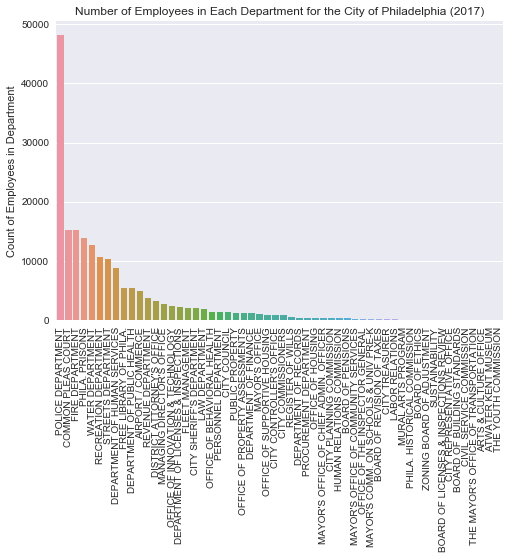

In [55]:
d=df.groupby(['department'])['value'].sum().reset_index()

d.sort_values('value', ascending=False, inplace=True)

b = sns.barplot(d['department'], d['value'])

plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel('Count of Employees in Department')
plt.title('Number of Employees in Each Department for the City of Philadelphia (2017)')
plt.show()

### 5 highest and lowest departments by number of employees

In [46]:
print(d.head())
print(d.tail())

            department  value
44   POLICE DEPARTMENT  48148
16  COMMON PLEAS COURT  15257
23     FIRE DEPARTMENT  15215
43      PHILA. PRISONS  13809
54    WATER DEPARTMENT  12627
                              department  value
15              CIVIL SERVICE COMMISSION     28
52  THE MAYOR'S OFFICE OF TRANSPORTATION     26
1                  ARTS & CULTURE OFFICE     21
2                    ATWATER KENT MUSEUM     17
53                  THE YOUTH COMMISSION      2


## Now let's look at how much people are paid on average in each department

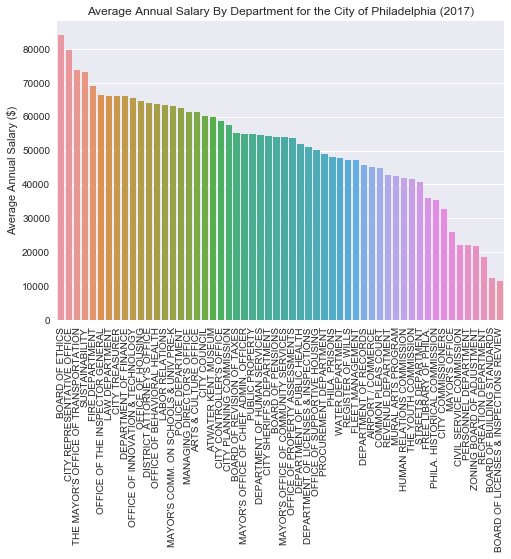

In [47]:
h=df.groupby(['department'])['annual_salary'].mean().reset_index()

h.sort_values('annual_salary', ascending=False,inplace=True)

b = sns.barplot(h['department'], h['annual_salary'])
plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel('Average Annual Salary ($)')
plt.title('Average Annual Salary By Department for the City of Philadelphia (2017)')
plt.show()

### Top and Bottom 5

In [48]:
h.sort_values(by='annual_salary', ascending=False,inplace=True)
print(h.head())
print(h.tail())

                              department  annual_salary
4                        BOARD OF ETHICS   84034.907692
12            CITY REPRESENTATIVE OFFICE   79575.081081
52  THE MAYOR'S OFFICE OF TRANSPORTATION   73699.692308
51                        SUSTAINABILITY   73175.250000
23                       FIRE DEPARTMENT   68998.683273
                                department  annual_salary
41                    PERSONNEL DEPARTMENT   22045.549742
55              ZONING BOARD OF ADJUSTMENT   21858.966667
47                   RECREATION DEPARTMENT   18570.322514
3              BOARD OF BUILDING STANDARDS   12483.064516
5   BOARD OF LICENSES & INSPECTIONS REVIEW   11550.000000


Only in America does the Board of Ethics make the most money...

## Highest and lowest salaries by individuals

In [49]:
df2=df.groupby(['last_name', 'first_name'])['annual_salary'].mean().reset_index()
df2.sort_values(by='annual_salary',ascending=False, inplace=True)
print(df2.head())
print(df2.tail())

      last_name first_name  annual_salary
12532    GULINO        SAM       265932.0
26925   ROSS JR    RICHARD       240000.0
5433        CHU     ALBERT       236135.0
16648    KENNEY      JAMES       218110.0
4475    CAMERON   ROCHELLE       215000.0
         last_name first_name  annual_salary
7247         DAVIS      APRIL            0.0
27814  SCHOOLFIELD     DANEDA            0.0
27812    SCHOFIELD   VIRGINIA            0.0
16107       JORDAN      TRUDY            0.0
18170        LEWIS    WHITNEY            0.0


## Let's look at how ~~little~~ much people are paid by title

In [50]:
df3=df.groupby(['title'])['annual_salary'].mean().reset_index()
df3.sort_values(by='annual_salary', ascending=False,inplace=True)
print(df3.head())
print(df3.tail())

                                         title  annual_salary
1220                          MEDICAL EXAMINER       265932.0
640           DEPUTY MAYOR/POLICE COMMISSIONER       240000.0
641             DEPUTY MEDICAL EXAMINER (N40A)       236135.0
1211                                     MAYOR       218110.0
318   CHIEF EXECUTIVE OFFICER-DIV. OF AVIATION       215000.0
                                          title  annual_salary
1750                   VOCATIONAL SCHOOL INTERN            0.0
986   HIGH SCHOOL INTERN APPRENTICE - FLEET MGT            0.0
1488                    RECREATION AIDE TRAINEE            0.0
202     ASST. TO THE DIR. - COMM. MURAL PROGRAM            0.0
1179                                LIFEGUARD 2            0.0


## Find how much we spend on City Employee's salaries annually

In [51]:
annualspending = df2['annual_salary'].sum()
df4=df.groupby(['title'])['annual_salary'].mean().reset_index()
print(annualspending)

1690392080.8900404


#### $1.7 Billion! Wow!

## What's intern pay like?

In [52]:
interns = df4[df4['title'].str.contains('INTERN')]
print(interns)

                                          title  annual_salary
679   DIR. OF URBAN POLICY & INTERNATIONAL AFFA   66333.333333
785                          ENGINEERING INTERN   30618.507521
936                             GRADUATE INTERN   21931.681818
986   HIGH SCHOOL INTERN APPRENTICE - FLEET MGT       0.000000
987               HIGH SCHOOL VOCATIONAL INTERN       0.000000
1079                                     INTERN       0.000000
1080                INTERNAL ACCOUNTING AUDITOR  100104.000000
1380                              POLICY INTERN       0.000000
1656                              SUMMER INTERN       0.000000
1750                   VOCATIONAL SCHOOL INTERN       0.000000
1808                          WORK STUDY INTERN   22978.525773


## Mostly unpaid positions. What's the hourly pay like?

In [53]:
interns = interns.loc[interns['title'].isin(['ENGINEERING INTERN', 'GRADUATE INTERN', 'WORK STUDY INTERN'])]
interns['hourly wage'] = interns['annual_salary']/2080
print(interns)

                   title  annual_salary  hourly wage
785   ENGINEERING INTERN   30618.507521    14.720436
936      GRADUATE INTERN   21931.681818    10.544078
1808   WORK STUDY INTERN   22978.525773    11.047368


## Pay isn't great!